In [82]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
import string

In [83]:
df = pd.read_csv("C:/Users/dhruv/Desktop/HFI_assessment/assignment_data.csv")

In [84]:
df.head()

,SetID,Adverse Reactions,Summary
0,a834d1cf-72fc-93bf-e053-2995a90a6191,The following adverse events were observed and...,NaN
1,a835b697-2beb-1ba8-e053-2995a90a470c,The following serious adverse reactions are de...,NaN
2,a837f13e-fafc-0535-e053-2995a90a5070,ADVERSE REACTIONS Clinical Trials Experience I...,NaN
3,a838204b-9564-9aa6-e053-2a95a90af02f,ADVERSE REACTIONS Clinical Trials Experience I...,NaN
4,f265e6dd-f47e-4511-9468-282184bcd1b1,The most common adverse reactions leading to d...,NaN


In [51]:
df['Summary'] = df['Adverse Reactions'].str.lower()

In [52]:
df['Summary'] = df['Summary'].apply(lambda x:''.join([i for i in x 
                                                  if i not in string.punctuation]))

In [53]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords

clean = []
for i in df['Summary']:
    clean.append(remove_stopwords(i))

In [55]:
df['Summary']=clean

In [56]:
def tagging(content):
    temp = []
    for i in content:
        temp.append(nltk.pos_tag(word_tokenize(i)))
    return temp

In [57]:
postag = tagging(clean)

In [58]:
nltk.pos_tag(word_tokenize(df['Summary'][0]))

[('following', 'VBG'),
 ('adverse', 'JJ'),
 ('events', 'NNS'),
 ('observed', 'VBD'),
 ('reported', 'JJ'),
 ('patients', 'NNS'),
 ('propranolol', 'VBP'),
 ('cardiovascular', 'JJ'),
 ('bradycardia', 'NN'),
 ('congestive', 'JJ'),
 ('heart', 'NN'),
 ('failure', 'NN'),
 ('intensification', 'NN'),
 ('av', 'NN'),
 ('block', 'NN'),
 ('hypotension', 'NN'),
 ('paresthesia', 'NN'),
 ('hands', 'VBZ'),
 ('thrombocytopenic', 'JJ'),
 ('purpura', 'NN'),
 ('arterial', 'JJ'),
 ('insufficiency', 'NN'),
 ('usually', 'RB'),
 ('raynaud', 'VBZ'),
 ('type', 'JJ'),
 ('central', 'JJ'),
 ('nervous', 'JJ'),
 ('lightheadedness', 'NN'),
 ('mental', 'JJ'),
 ('depression', 'NN'),
 ('manifested', 'VBD'),
 ('insomnia', 'JJ'),
 ('lassitude', 'NN'),
 ('weakness', 'NN'),
 ('fatigue', 'NN'),
 ('catatonia', 'NN'),
 ('visual', 'JJ'),
 ('disturbances', 'NNS'),
 ('hallucinations', 'NNS'),
 ('vivid', 'VBP'),
 ('dreams', 'NNS'),
 ('acute', 'VBP'),
 ('reversible', 'JJ'),
 ('syndrome', 'JJ'),
 ('characterized', 'VBN'),
 ('disorien

In [67]:
check = []
temp3 = []
for i in range(len(postag)):
    for j in range(len(postag[i])):
        if postag[i][j][1]=='NN':
            check.append(postag[i][j][0])
    temp3.append(check)
    check=[]

In [68]:
df['PreProcessed']=temp3

In [69]:
df['PreProcessed']

0      [bradycardia, heart, failure, intensification,...
1      [section, lymphohistiocytosis, hypersensitivit...
2      [experience, cream, irritation, pruritus, derm...
3      [experience, cream, irritation, pruritus, derm...
4                     [discontinuation, headache, cough]
                             ...                        
985    [mouth, somnolence, asthenia, dizziness, tract...
986    [intensity, incidence, adult, hiv1, trial, dru...
987    [indication, adult, placebo, headache, nausea,...
988                   [diarrhea, rash, nausea, headache]
989    [respiratory, infection, inflammation, throat,...
Name: PreProcessed, Length: 990, dtype: object

In [70]:
df['Summary'] = temp3

In [71]:
X = ''
for i in df['Summary'][0]:
    print(i)
    X.join(i)

bradycardia
heart
failure
intensification
av
block
hypotension
paresthesia
purpura
insufficiency
lightheadedness
depression
lassitude
weakness
fatigue
catatonia
disorientation
time
place
memory
loss
lability
sensorium
performance
lethargy
nausea
cramping
diarrhea
constipation
thrombosis
colitis
hypersensitivity
rash
fever
throat
laryngospasm
respiratory
distress
respiratory
bronchospasm
agranulocytosis
purpura
purpura
lupus
erythematosus
sle
toxic
necrolysis
dermatitis
erythema
multiforme
alopecia
slelike
syndrome
conjunctivae
blocker
practolol
male
impotence


In [73]:
Y = []
for i in df['Summary']:
    Y.append(' '.join(i)) 

In [74]:
df['Summary']= Y

565

In [76]:
df['Summary'][5]

'literature allopurinol experience event initiation treatment increase acute incidence acute gouty explanation decrease therapy administration reaction allopurinol skin rash skin treatment allopurinol reaction fever jaundice leukocytosis year drug reaction skin eruption usage skin explanation decrease incidence rash presence insufficiency frequency rash amoxicillin drug rash drug hypersensitivity syndrome dhs association allopurinol use syndrome syndrome profuse skin rash syndrome week therapy latency'

1682

In [77]:
df.head()

,SetID,Adverse Reactions,Summary,PreProcessed
0,a834d1cf-72fc-93bf-e053-2995a90a6191,The following adverse events were observed and...,bradycardia heart failure intensification av b...,"[bradycardia, heart, failure, intensification,..."
1,a835b697-2beb-1ba8-e053-2995a90a470c,The following serious adverse reactions are de...,section lymphohistiocytosis hypersensitivity b...,"[section, lymphohistiocytosis, hypersensitivit..."
2,a837f13e-fafc-0535-e053-2995a90a5070,ADVERSE REACTIONS Clinical Trials Experience I...,experience cream irritation pruritus dermatiti...,"[experience, cream, irritation, pruritus, derm..."
3,a838204b-9564-9aa6-e053-2a95a90af02f,ADVERSE REACTIONS Clinical Trials Experience I...,experience cream irritation pruritus dermatiti...,"[experience, cream, irritation, pruritus, derm..."
4,f265e6dd-f47e-4511-9468-282184bcd1b1,The most common adverse reactions leading to d...,discontinuation headache cough,"[discontinuation, headache, cough]"


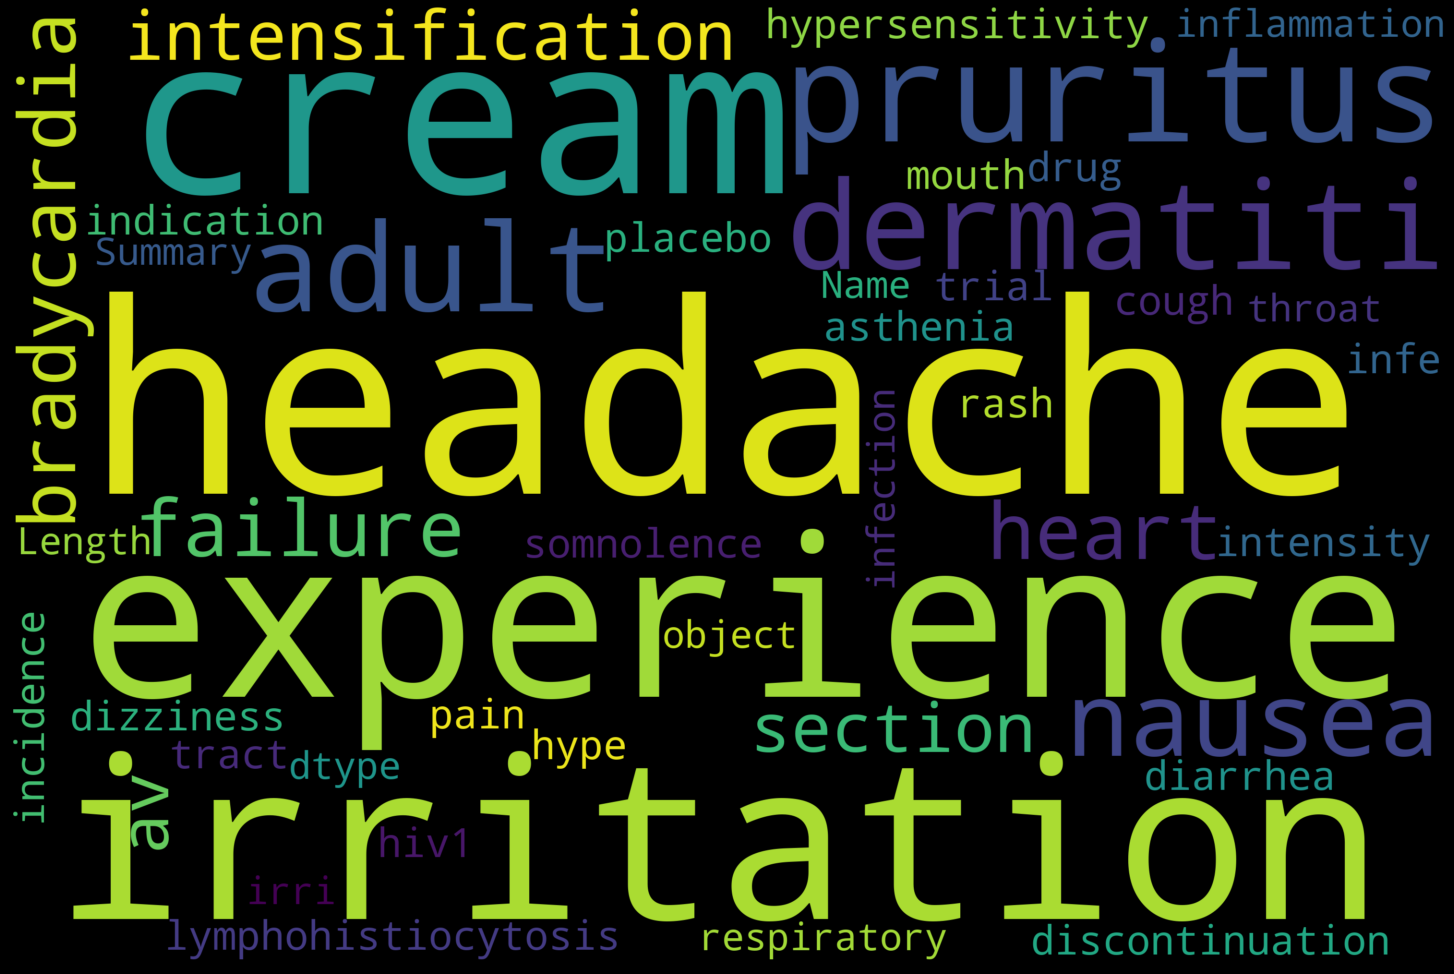

In [79]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text1 = df['Summary']
wordcloud1 = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    ).generate(str(text1))
fig = plt.figure(
    figsize = (20, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()